In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [64]:
#verilerin yüklenmesi
veriler=pd.read_csv("/content/my_iris.csv")
veriler

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [65]:
#KORELASYON İLİŞKİLERİ
corr_matrix = veriler.corr()
def en_yuksek_iliskiler(corr_matrix):
    # Korelasyon matrisini sütunlara göre sıralama
    sorted_corr = corr_matrix.unstack().sort_values(ascending=False)

    # Sıralanmış korelasyon değerlerinin en yüksek olduğu sütun ikililerini yazdırma
    for i, (s1, s2) in enumerate(sorted_corr.index):
        if s1 != s2:  # Aynı sütun ikilisini tekrarlamamak için
            print(f"{s1}-{s2}: {sorted_corr[i]}")

# Örnek kullanım
en_yuksek_iliskiler(corr_matrix)

petal_length-petal_width: 0.9627570970509662
petal_width-petal_length: 0.9627570970509662
sepal_length-petal_length: 0.8717541573048716
petal_length-sepal_length: 0.8717541573048716
sepal_length-petal_width: 0.8179536333691642
petal_width-sepal_length: 0.8179536333691642
sepal_length-sepal_width: -0.10936924995064931
sepal_width-sepal_length: -0.10936924995064931
sepal_width-petal_width: -0.35654408961380507
petal_width-sepal_width: -0.35654408961380507
sepal_width-petal_length: -0.4205160964011539
petal_length-sepal_width: -0.4205160964011539


<ipython-input-65-b4fccfc7c866>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = veriler.corr()


In [66]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

def one_hot_encode(data, columns):
    # Kategorik sütunları seçme
    categorical_data = data[columns]

    # One-Hot Encoder oluşturma
    encoder = OneHotEncoder(sparse=False, drop='first')

    # Kategorik veriyi dönüştürme
    encoded_data = encoder.fit_transform(categorical_data)

    # One-Hot Encoding sonucunu DataFrame'e dönüştürme
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))

    # Dönüştürülmüş veriyi orijinal veriyle birleştirme
    preprocessed_data = pd.concat([data.drop(columns, axis=1), encoded_df], axis=1)

    return preprocessed_data




def min_max_scale(data, column):
    # Min-Max Scaler oluşturma
    scaler = MinMaxScaler()

    # Sütunu seçme ve ölçeklendirme
    scaled_column = scaler.fit_transform(data[[column]])

    # Ölçeklendirilmiş sütunu yeni bir DataFrame'e dönüştürme
    scaled_data = pd.DataFrame(scaled_column, columns=[column])

    # Ölçeklendirilmiş sütunu orijinal veri setine ekleme
    data[column] = scaled_data[column]

    return data


def fill_nan_with_mean(data):
    for column in data.columns:
        if data[column].isnull().any():
            mean = data[column].mean()
            data[column].fillna(mean, inplace=True)
    return data


def veriOnIsleme(data, columnsForOneHotEncoder, columnsForMinMaxScaler):
    dataForOneHot = one_hot_encode(data, columnsForOneHotEncoder)
    for column in columnsForMinMaxScaler:
        dataForOneHot = min_max_scale(dataForOneHot, column)  # Düzeltme: dataForOneHot kullanılmalı
    result = fill_nan_with_mean(dataForOneHot)
    return result

In [67]:
veriSetim=pd.read_csv("/content/my_iris.csv")
veriOnİslemeliSetDuzelt=veriOnIsleme(veriSetim, ["species"], ["sepal_length","sepal_width","petal_width"])
#veriOnİslemeliSetDuzelt=veriOnİslemeliSetDuzelt.drop(["RowNumber","CustomerId","Surname", "Geography", "Gender"], axis=1)

MyX = veriOnİslemeliSetDuzelt.drop(["petal_length"],axis=1)
MyY = veriOnİslemeliSetDuzelt["petal_length"]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [68]:
MyX

,sepal_length,sepal_width,petal_width,species_versicolor,species_virginica
0,0.222222,0.625000,0.041667,0.0,0.0
1,0.166667,0.416667,0.041667,0.0,0.0
2,0.111111,0.500000,0.041667,0.0,0.0
3,0.083333,0.458333,0.041667,0.0,0.0
4,0.194444,0.666667,0.041667,0.0,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.916667,0.0,1.0
146,0.555556,0.208333,0.750000,0.0,1.0
147,0.611111,0.416667,0.791667,0.0,1.0
148,0.527778,0.583333,0.916667,0.0,1.0


In [69]:
MyY

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [70]:
def parcalamaIslemi(A,B):
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(A, B,test_size=0.2,random_state=42)
  return X_train, X_test, Y_train, Y_test

In [71]:
MyX_train, MyX_test, MyY_train, MyY_test=parcalamaIslemi(MyX, MyY)

In [72]:
# Build a Neural Network
#-----------------------
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation="relu"), # 100 units
  tf.keras.layers.Dense(30,activation="relu"), # 100 units
  tf.keras.layers.Dense(10,activation="relu"), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(MyX_train, MyY_train, epochs=200, validation_data=(MyX_test, MyY_test))

Epoch 1/200
4/4 [==============================] - 1s 106ms/step - loss: 3.6879 - mae: 3.6879 - val_loss: 3.7629 - val_mae: 3.7629
Epoch 2/200
4/4 [==============================] - 0s 20ms/step - loss: 3.5675 - mae: 3.5675 - val_loss: 3.6212 - val_mae: 3.6212
Epoch 3/200
4/4 [==============================] - 0s 25ms/step - loss: 3.4255 - mae: 3.4255 - val_loss: 3.4751 - val_mae: 3.4751
Epoch 4/200
4/4 [==============================] - 0s 22ms/step - loss: 3.2791 - mae: 3.2791 - val_loss: 3.3186 - val_mae: 3.3186
Epoch 5/200
4/4 [==============================] - 0s 23ms/step - loss: 3.1176 - mae: 3.1176 - val_loss: 3.1403 - val_mae: 3.1403
Epoch 6/200
4/4 [==============================] - 0s 24ms/step - loss: 2.9351 - mae: 2.9351 - val_loss: 2.9394 - val_mae: 2.9394
Epoch 7/200
4/4 [==============================] - 0s 24ms/step - loss: 2.7290 - mae: 2.7290 - val_loss: 2.7051 - val_mae: 2.7051
Epoch 8/200
4/4 [==============================] - 0s 24ms/step - loss: 2.4893 - mae: 2.4

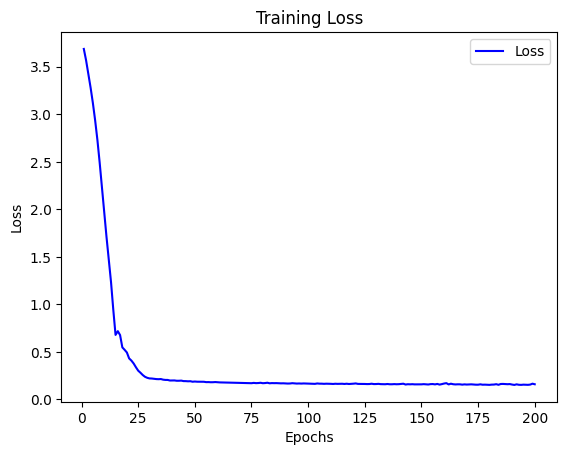

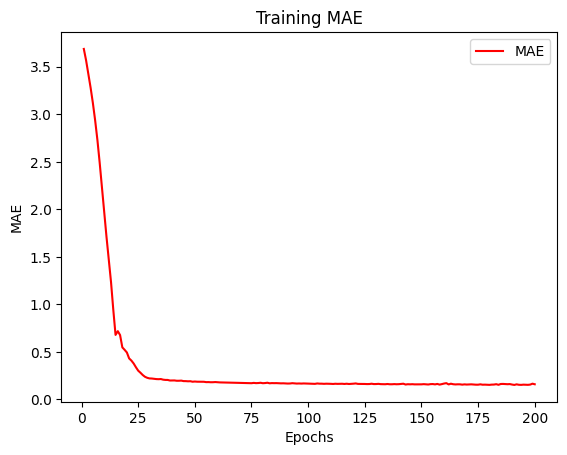

In [73]:
import matplotlib.pyplot as plt

# Modelin eğitim sürecinden kayıp ve MAE değerlerini alın
loss = history.history['loss']
mae = history.history['mae']

# Eğitim sürecinin epoch sayısını alın
epochs = range(1, len(loss) + 1)

# Kayıp değerlerini çizdirin
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MAE değerlerini çizdirin
plt.plot(epochs, mae, 'r', label='MAE')
plt.title('Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


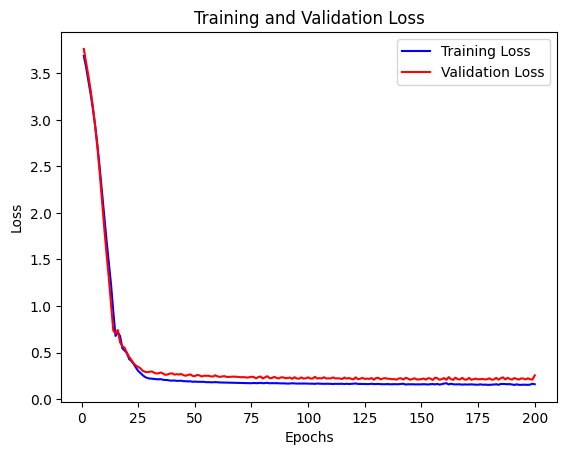

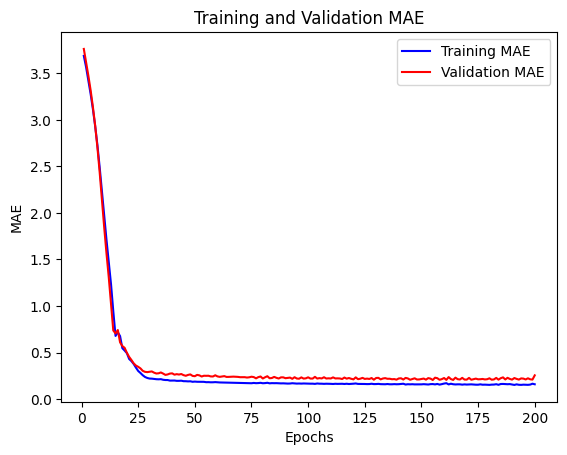

In [74]:
val_loss = history.history['val_loss']
val_mae = history.history['val_mae']

# Eğitim kaybı ve doğrulama kaybı değerlerini çizdirin
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim MAE ve doğrulama MAE değerlerini çizdirin
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [75]:
# evaluate the model
insurance_model_2.evaluate(MyX_test,MyY_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.2550 - mae: 0.2550


[0.25500956177711487, 0.25500956177711487]

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
# Test verileri üzerinde tahmin yapma
y_pred = insurance_model_2.predict(MyX_test)

# Calculate metrics
mse = mean_squared_error(MyY_test, y_pred)
r2 = r2_score(MyY_test, y_pred)
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#   MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(MyY_test, y_pred)
print("Ortalama Mutlak Hata (MAE):", mae)
# RMSE
rmse = np.sqrt(mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)


1/1 [==============================] - 0s 76ms/step
Mean Squared Error (MSE): 0.0929544408538967
Coefficient of Determination (R^2): 0.971637653020356
Ortalama Mutlak Hata (MAE): 0.25500953594843545
Kök Ortalama Kare Hata (RMSE): 0.3048843073263967


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate sensitivity (recall)
    sensitivity = recall_score(y_true, y_pred, average='weighted')

    # Calculate specificity
    unique_labels = set(y_true)
    specificity = {}
    for label in unique_labels:
        true_negatives = sum((y_true != label) & (y_pred != label))
        false_positives = sum((y_true != label) & (y_pred == label))
        specificity[label] = true_negatives / (true_negatives + false_positives)

    return f1, precision, sensitivity, specificity